# Assignment 2
### Last updated: June 23, 2022

### Name: Kevin Borah

### Uniqname: kborah

## Instructions

Please turn in:
1. A Jupyter Notebook file. This file should show all of the required work, including code, results, visualizations (if any), and necessary comments to your code. Irrelevant code and results should be deleted prior to submission. This file is submitted automatically when you submit your notebook to be autograded. This is done in Assignment 2 -- Create. 

2. An HTML file of the Notebook. Submit this file in Assignment 2 - Submit. 

3. A PDF file of the Notebook. Submit this file in Assignment 2 - Submit.  

### Before submitting, please select Kernel -> Restart & Run All.

### Please do not remove any code outside of the Not Implemented Error sections. The autograder may need it. 

# Assignment 2

In [1]:
import networkx as nx
import pandas as pd
import numpy as np

import urllib
import random
import json
import operator
import random

import matplotlib.pyplot as plt
#import seaborn as sns

## Dataset description

In this assignment, you will explore several network generative models to understand how varying model parameters affects network structure. Our exploration will be based on a real-world dataset: 

[Astrophysics collaborations](http://www-personal.umich.edu/~mejn/netdata/astro-ph.zip): a network of coauthorships between scientists posting preprints on the Astrophysics E-Print Archive between Jan 1, 1995 and December 31, 1999. An edge exists between two researchers if they have co-authored at least one paper. 

Newman, M. E. (2001). The structure of scientific collaboration networks. Proceedings of the national academy of sciences, 98(2), 404-409.

Let's load the graph from `assets/astro_phy.gml`.

In [2]:
G = nx.read_gml('assets/astro_phy.gml')  # load the graph to G

# YOUR CODE HERE
# raise NotImplementedError()

`plot_deg_distribution(G, z, log)` is a helper function that can plot the degree distribution of graph `G` using the NetworkX function `degree_histogram`. `z` is a zoom-in parameter. If $z \ge 0$ is specified, a zoom-in plot will be presented and show only the first $z$ values in the node distribution array. If no $z$ is specified, the plot of the complete node distribution will be shown. `log` is a flag indicating whether to plot the node distribution in log-log scale. It is defaulted to `False`.

In [3]:
class fig_wrapper:
    def __init__(self):
        self.img = None
        self.log = False
        self.x = []
        self.y = []

def plot_deg_distribution(G, z=-1, log=False):
    wrapper = fig_wrapper()
    freq = nx.degree_histogram(G);
    x = [i for i in range(len(freq))]
    if log:
        wrapper.log = True
        freq = [np.log(f+1) for f in freq]
        x = [np.log(i+1) for i in x]
        fig, ax = plt.subplots(figsize = (5, 4))
        ax.scatter(x=x, y=freq, color='#fc7930',s=5);
        ax.set_title("log-log scale")
        wrapper.img = ax
        wrapper.x = x
        wrapper.y = freq
        return wrapper
    if z < 0:
        fig, ax = plt.subplots(figsize = (5, 4))
        ax.scatter(x=x, y=freq, color='#fc7930',s=5);
        ax.set_title("linear scale")
    else:
        fig, ax = plt.subplots(figsize = (5, 4))
        ax.scatter(x=x[:20], y=freq[:20], color='#fc7930',s=5);  # zoom in
        ax.set_title("zoom-in")
    wrapper.img = ax
    wrapper.x = x
    wrapper.y = freq
    print(wrapper)
    return wrapper

--- 

## Part 1. Modeling the real astrophysics collaboration network


### Q1. Degree distribution of the astrophysics collaboration network
#### 1.1 (1 point, Autograded) Plot the node degree distribution of the astrophysics collaboration network in log-log scale using the function `plot_deg_distribution(G, z, log)` provided above.

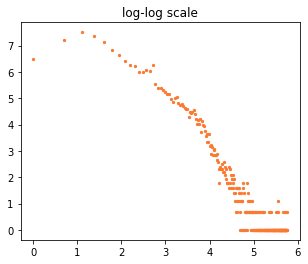

In [4]:
ans = plot_deg_distribution(G, log = True)  # assign the return value of plot_deg_distribution(G, z, log) here
# YOUR CODE HERE
# raise NotImplementedError()

In [5]:
#hidden tests for Question 1.1 are within this cell

#### 1.2 (1 point, Autograded) Does the distribution look more like a power law distribution or a normal distribution?
> Indicate the distribution by assigning either of the two strings to `distribution_more_like`:
> - `"power law"`
> - `"normal"`

In [6]:
distribution_more_like = "power law"  # a string with the value "power law" or "normal"

# YOUR CODE HERE
# raise NotImplementedError()

In [7]:
#hidden tests for Question 1.2 are within this cell

### Q2. (2 points, Autograded) What is the transitivity and average clustering coefficient of this network?

In [8]:
transitivity = nx.transitivity(G)        # transitivity value. This should be a float. 
average_clustering = nx.average_clustering(G)  # average clustering coefficient. This should be a float. 

# YOUR CODE HERE
# raise NotImplementedError()
transitivity, average_clustering

(0.35974084901216435, 0.5959058646296254)

In [9]:
#hidden tests for Question 2 are within this cell

### Q3. (3 points, Autograded) What is the maximum, minimum, mean, and standard deviation of the PageRank values of the nodes in $G$?

In [10]:
pagerank_dict = nx.pagerank(G)

max_pgv = max(pagerank_dict.values())  # maximum PageRank value. This should be a float. 
min_pgv = min(pagerank_dict.values())  # minimum PageRank value. This should be a float. 
mean_pgv = np.array(list(pagerank_dict.values())).mean()  # mean of PageRank value. This should be a float. 
std_pgv = np.array(list(pagerank_dict.values())).std()  # standard deviation of PageRank value. This should be a float. 

max_pgv, min_pgv, mean_pgv, std_pgv
# YOUR CODE HERE
# raise NotImplementedError()

(0.0007549911273143324,
 9.29080217842842e-06,
 5.9858733389201475e-05,
 4.8109295457371815e-05)

In [11]:
#hidden tests for Question 3 are within this cell

### Now that we have obtained some basic properties of the structure of network G, you will compare them with the properties of random networks with around the same number of nodes and edges using the various models we covered in lecture: the Erdős-Rényi model, the preferential attachment model, and a small world model. 

### Erdős-Rényi Graph

The NetworkX function `erdos_renyi_graph` with parameters $n$ and $p$ generates an Erdős-Rényi Graph with `n` nodes and where each pair of nodes is connected by an edge with probability `p`. If the parameter directed is set to `True`, the function generates a directed graph. Since in this case we want an undirected graph, you should set the parameter directed to `False`.

An alternative function, `fast_gnp_random_graph` produces the same graph and has the same parameters as `erdos_renyi_graph`. However, `fast_gnp_random_graph`is faster when the expected number of edges is small (i.e. sparse graph). 

### Q4. (4 points, Autograded) Use the function `fast_gnp_random_graph` to create a random graph $G_1$, such that $G_1$ has the same number of nodes as $G$ and the expected number of edges of $G_1$ is the same as the number of edges in $G$. Plot the node degree distribution of $G_1$.

**Hint**: to pass the autograder, please make sure your plot is in linear scale.

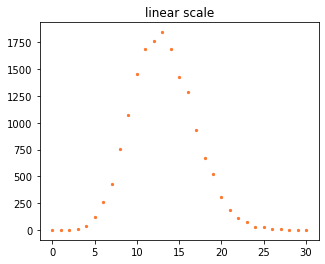

In [12]:
random.seed(0)   # sync the autograder

n = len(G.nodes)  # number of nodes. This should be an int. 
m = len(G.edges)  # number of edges. This should be an int. 
p = m / (n*(n-1)/2)  # probability of edges between nodes. This should be a float in [0,1]. 
# p = n/m
G1 = nx.fast_gnp_random_graph(n,p)   # assign your networkx graph here.
ans = plot_deg_distribution(G1)  # assign your return value of plot_deg_distribution(G1, z, log) here.

# YOUR CODE HERE
# raise NotImplementedError()

In [13]:
p

0.0007820585620868005

In [14]:
#hidden tests for Question 4 are within this cell

### Q5. (2 points, Autograded) What is the transitivity and average clustering coefficient of $G_1$?

In [15]:
transitivity = nx.transitivity(G1)        # transitivity value. This should be a float. 
average_clustering = nx.average_clustering(G1)# clustering coefficient value. This should be a float. 


transitivity, average_clustering
# YOUR CODE HERE
# raise NotImplementedError()

(0.0007693775169860527, 0.0007734629507445311)

In [16]:
#hidden tests for Question 5 are within this cell

### Q6. (3 points, Autograded) What is the maximum, minimum, mean, and standard deviation of the PageRank values of the nodes in $G_1$?

In [17]:
pagerank_dict = nx.pagerank(G1)

max_pgv = max(pagerank_dict.values())  # maximum PageRank value. This should be a float. 
min_pgv = min(pagerank_dict.values())  # minimum PageRank value. This should be a float. 
mean_pgv = np.array(list(pagerank_dict.values())).mean()  # mean of PageRank value. This should be a float. 
std_pgv = np.array(list(pagerank_dict.values())).std()  # standard deviation of PageRank value. This should be a float. 

max_pgv, min_pgv, mean_pgv, std_pgv
# YOUR CODE HERE
# raise NotImplementedError()

(0.00012558604465734226,
 1.7471614482930626e-05,
 5.9858733389201475e-05,
 1.4019238368068415e-05)

In [18]:
#hidden tests for Question 6 are within this cell

### Preferential attachment model

The function `barabasi_albert_graph(n, avg_m)` generates a random graph using the preferential attachment model with `n` nodes and where each arriving node attaches to `m` existing nodes. 

### Q7. (4 points, Autograded) Use the preferential attachment model to create a random graph $G_2$, such that $G_2$ has around the same number of nodes and edges as $G$. Plot the node degree distribution of $G_2$ in log-log scale.

**Hint**: 

1. if you cannot find an integer value for the number of edges added by each node, just round down to an integer value.

2. In the function `barabasi_albert_graph(n, avg_m)`, 
    - `n` is the number of nodes
    - `avg_m` is the number of edges to attach from *a new node* to *existing nodes*. 
   Therefore, the total number of edges created by this function is around `n * avg_m`. We already know that $G_1$ has `m` edges. Therefore, using the variables we can calculate `avg_m`.

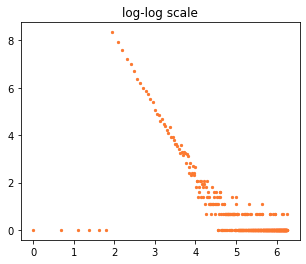

In [19]:
random.seed(0)  # sync for the autograder

avg_m = int(m/n)  # average number of edges increased by each additional node. This should be an int. 
G2 = nx.barabasi_albert_graph(n,avg_m)     # assign your networkx graph here
ans = plot_deg_distribution(G2,log=True)    # assign your return value of plot_deg_distribution(G, z, log) here

# YOUR CODE HERE
# raise NotImplementedError()

In [20]:
#hidden tests for Question 7 are within this cell

### Q8. (2 points, Autograded) What is the transitivity and average clustering coefficient of $G_2$?

In [21]:
transitivity = nx.transitivity(G2)        # transitivity value. This should be a float. 
average_clustering = nx.average_clustering(G2)# clustering coefficient value. This should be a float. 


transitivity, average_clustering
# YOUR CODE HERE
# raise NotImplementedError()

(0.00398438864176888, 0.005460554689061091)

In [22]:
#hidden tests for Question 8 are within this cell

### Q9. (3 points, Autograded) What is the maximum, minimum, mean, and standard deviation of the PageRank values of the nodes in $G_2$?

In [23]:
pagerank_dict = nx.pagerank(G2)

max_pgv = max(pagerank_dict.values())  # maximum PageRank value. This should be a float. 
min_pgv = min(pagerank_dict.values())  # minimum PageRank value. This should be a float. 
mean_pgv = np.array(list(pagerank_dict.values())).mean()  # mean of PageRank value. This should be a float. 
std_pgv = np.array(list(pagerank_dict.values())).std()  # standard deviation of PageRank value. This should be a float. 

max_pgv, min_pgv, mean_pgv, std_pgv
# YOUR CODE HERE
# raise NotImplementedError()

(0.0022206468767582343,
 3.119632450192332e-05,
 5.9858733389201475e-05,
 6.771599585211252e-05)

In [24]:
#hidden tests for Question 9 are within this cell

### Small world networks

The function `nx.watts_strogatz_graph(n,k,p)` generates a small world network with `n` nodes. Initially, nodes are connected to their `k` nearest neighbors in a ring topology. Then each edge is rewired with probability `p`.


### Q10. (4 points, Autograded) Create a small world network $G_3$ with the same number of nodes as network $G$ and with a number of edges that is as close as possible to the number of edges in network $G$.  Plot the node degree distribution of $G_3$ in log-log scale. Set $p=0.1$.

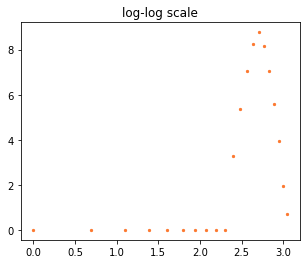

In [25]:
random.seed(0)  # sync for autograder
k = (m * 2) / n
G3 = nx.watts_strogatz_graph(n,14,.1)       # your networkx graph
ans = plot_deg_distribution(G3, log = True)      # assign your return value of plot_deg_distribution(G, z, log) here

# YOUR CODE HERE
# raise NotImplementedError()

In [26]:
#hidden tests for Question 10 are within this cell

In [27]:
int(k-1)

12

In [28]:
k1 = (2*m)/n
k1

13.064288279660003

### Q11. (2 points, Autograded) What is the transitivity and average clustering coefficient of $G_3$?

In [29]:
transitivity = nx.transitivity(G3)        # transitivity value. This should be a float. 
average_clustering = nx.average_clustering(G3)# clustering coefficient value. This should be a float. 


transitivity, average_clustering
# YOUR CODE HERE
# raise NotImplementedError()

(0.5017513546551947, 0.5083507420821322)

In [30]:
#hidden tests for Question 11 are within this cell

### Q12. (3 points, Autograded) What is the maximum, minimum, mean, and standard deviation of the PageRank values of the nodes in $G_3$?

In [31]:
pagerank_dict = nx.pagerank(G3)

max_pgv = max(pagerank_dict.values())  # maximum PageRank value. This should be a float. 
min_pgv = min(pagerank_dict.values())  # minimum PageRank value. This should be a float. 
mean_pgv = np.array(list(pagerank_dict.values())).mean()  # mean of PageRank value. This should be a float. 
std_pgv = np.array(list(pagerank_dict.values())).std()  # standard deviation of PageRank value. This should be a float. 

max_pgv, min_pgv, mean_pgv, std_pgv
# YOUR CODE HERE
# raise NotImplementedError()

(8.081989949163038e-05,
 4.546588374358631e-05,
 5.985873338920148e-05,
 4.003008930107026e-06)

In [32]:
#hidden tests for Question 12 are within this cell

### Q13. (3 points, Autograded) Using the same values of `n` and `k` as you did for network $G_3$, generate a small world network using every $p$ in `np.linspace(0.1, 1, 10)` and compute the graph transitivity and average clustering coefficient. Plot a line graph for both attributes versus $p$.


In [33]:
tran = []  # assign your graph transitivity values as a numpy array to this variable.
clus = []   # assign your average clustering coefficient values as a numpy array to this variable.

for p in np.linspace(0.1, 1, 10):
    G = nx.watts_strogatz_graph(n,int(k),p) 
    tran.append(nx.transitivity(G))
    clus.append(nx.average_clustering(G))
    
tran = np.array(tran)
clus = np.array(clus)



# YOUR CODE HERE
# raise NotImplementedError()


In [34]:
#hidden tests for Question 13 are within this cell

### (2 points, Manually graded) Include the two plots here:

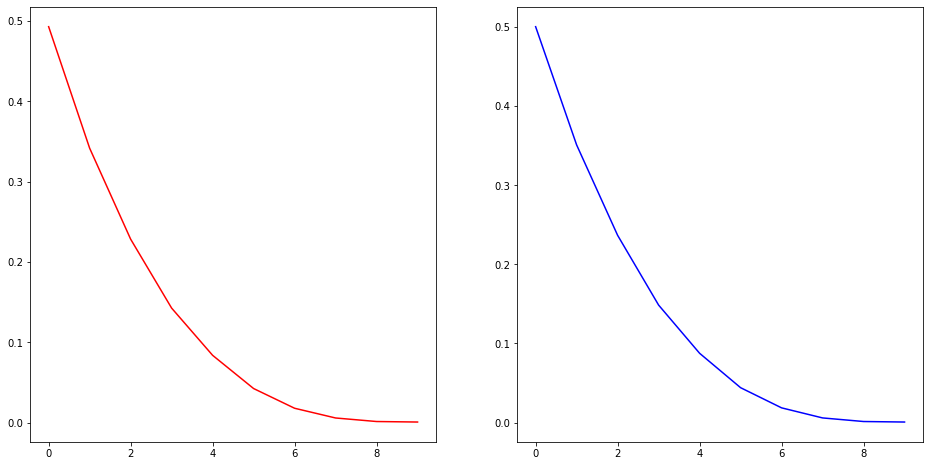

In [35]:
fig = plt.figure(figsize = (16,8))
plt.subplot(121)
plt.plot(tran, color = 'r')

plt.subplot(122)
plt.plot(clus, color = 'b')
# plt.show()

# YOUR CODE HERE
# raise NotImplementedError()

### Q14. (2 points, Autograded) Compare the features of the simulated networks with the real network $G$ and think of the following questions:

1. In terms of node degree distribution, which model should be most similar to the collaboration network?
2. In terms of transitivity and average clustering coefficient, which model should best approximate the collaboration network?

Indicate the solution of each question with one of the following strings:
- "Erdős-Rényi"
- "preferential attachment model"
- "small world network"

The questions are represented by `q1` and `q2`. For example, if you believe the answer to the first sub-question is Erdős-Rényi you should answer:
```python
q1 = "Erdős-Rényi"
```

In [36]:
q1 = 'preferential attachment model' # This should be a string
q2 = 'small world network' # This should be a string

# YOUR CODE HERE
# raise NotImplementedError()

In [37]:
#hidden tests for Question 14 are within this cell

---

## Part 2. Clustering of the generative models

In this part, you will explore the clustering coefficient and transitivity of the aforementioned generative models. Rather than making comparisons based on a single instance of each type of network, you will generate multiple random graphs and construct a distribution of the values. You will construct networks with relatively few nodes and edges to make the computation more efficient. The networks will have 100 nodes and around 425 edges. 

### Q15. (6 points, Autograded) Create 1000 random Erdős-Rényi graphs with `fast_gnp_random_graph` such that the networks have 100 nodes and are expected to have 425 edges.  For each graph, compute its transitivity and average clustering coefficient. Plot a histogram for both attributes.

<font color='red'>**Note**</font>: for the plots, use the function `hist` and set the parameter `bins=50`.

(array([ 2.,  0.,  3.,  1.,  2.,  4.,  5., 13.,  4., 13.,  8., 16., 17.,
        28., 19., 23., 38., 33., 28., 49., 62., 54., 50., 36., 55., 49.,
        46., 56., 43., 36., 31., 29., 26., 24., 19., 15., 10.,  9., 13.,
         8.,  5.,  5.,  7.,  1.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([0.05672916, 0.05796086, 0.05919255, 0.06042425, 0.06165594,
        0.06288764, 0.06411934, 0.06535103, 0.06658273, 0.06781443,
        0.06904612, 0.07027782, 0.07150951, 0.07274121, 0.07397291,
        0.0752046 , 0.0764363 , 0.07766799, 0.07889969, 0.08013139,
        0.08136308, 0.08259478, 0.08382648, 0.08505817, 0.08628987,
        0.08752156, 0.08875326, 0.08998496, 0.09121665, 0.09244835,
        0.09368005, 0.09491174, 0.09614344, 0.09737513, 0.09860683,
        0.09983853, 0.10107022, 0.10230192, 0.10353361, 0.10476531,
        0.10599701, 0.1072287 , 0.1084604 , 0.1096921 , 0.11092379,
        0.11215549, 0.11338718, 0.11461888, 0.11585058, 0.11708227,
        0.11831397]),
 <BarContainer

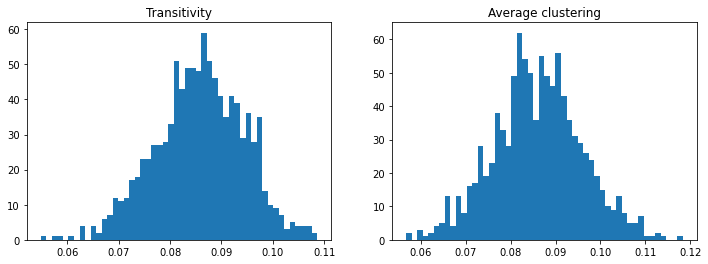

In [38]:
random.seed(0)
tran = []   # assign your graph transitivity values as a numpy array to this variable.
clus = []  # assign your average clustering coefficient values as a numpy array to this variable.

p = 425 / (100*(99)/2)

for count, item in enumerate(range(1000)):
    G = nx.fast_gnp_random_graph(100, p)
    tran.append(nx.transitivity(G))
    clus.append(nx.average_clustering(G))

fig, axes = plt.subplots(1,2,figsize = (12, 4))
axes[0].title.set_text("Transitivity");         # plot transitivity in subplot 0
axes[1].title.set_text("Average clustering");   # plot average clustering in subplot 1

tran = np.array(tran)
clus = np.array(clus)

axes[0].hist(tran, bins = 50)

axes[1].hist(clus, bins = 50)

# YOUR CODE HERE
# raise NotImplementedError()


In [39]:
#hidden tests for Question 15 are within this cell

### Q16. (6 points, Autograded) Create 1000 preferential attachment graphs with 100 nodes and each arriving node connecting to 4 existing nodes. For each graph, compute its transitivity and average clustering coefficient. Plot a histogram for both attributes.

(array([ 2.,  2.,  1.,  1.,  6.,  8.,  5., 15., 17., 26., 29., 34., 40.,
        40., 60., 46., 55., 70., 53., 47., 46., 54., 43., 47., 35., 48.,
        31., 31., 16., 17., 16.,  5., 18.,  8.,  9.,  5.,  3.,  1.,  0.,
         3.,  1.,  0.,  2.,  1.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([0.11000796, 0.11319281, 0.11637766, 0.11956251, 0.12274736,
        0.1259322 , 0.12911705, 0.1323019 , 0.13548675, 0.1386716 ,
        0.14185645, 0.14504129, 0.14822614, 0.15141099, 0.15459584,
        0.15778069, 0.16096554, 0.16415038, 0.16733523, 0.17052008,
        0.17370493, 0.17688978, 0.18007462, 0.18325947, 0.18644432,
        0.18962917, 0.19281402, 0.19599887, 0.19918371, 0.20236856,
        0.20555341, 0.20873826, 0.21192311, 0.21510796, 0.2182928 ,
        0.22147765, 0.2246625 , 0.22784735, 0.2310322 , 0.23421705,
        0.23740189, 0.24058674, 0.24377159, 0.24695644, 0.25014129,
        0.25332614, 0.25651098, 0.25969583, 0.26288068, 0.26606553,
        0.26925038]),
 <BarContainer

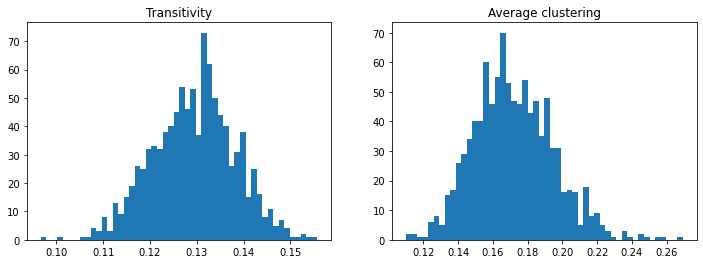

In [40]:
random.seed(0)

tran = []   # assign your graph transitivity values as a numpy array to this variable.
clus = []   # assign your average clustering coefficient values as a numpy array to this variable.

for count, item in enumerate(range(1000)):
    G = nx.barabasi_albert_graph(100, 4)
    tran.append(nx.transitivity(G))
    clus.append(nx.average_clustering(G))

fig, axes = plt.subplots(1,2,figsize = (12, 4))
axes[0].title.set_text("Transitivity");         # plot transitivity in subplot 0
axes[1].title.set_text("Average clustering");   # plot average clustering in subplot 1

tran = np.array(tran)
clus = np.array(clus)

axes[0].hist(tran, bins = 50)

axes[1].hist(clus, bins = 50)
# YOUR CODE HERE
# raise NotImplementedError()

In [41]:
#hidden tests for Question 16 are within this cell

### Q17. (6 points, Autograded) Create 1000 small world graphs with 100 nodes, $k = 4$, and rewiring probability $p=0.1$. For each graph, compute its transitivity and average clustering coefficient. Plot a histogram for both attributes.

(array([ 1.,  2.,  0.,  1.,  3.,  0.,  3.,  3.,  3.,  2.,  7.,  5., 14.,
        15., 18., 16., 25., 26., 35., 40., 32., 43., 31., 46., 45., 52.,
        44., 58., 48., 41., 48., 49., 49., 48., 27., 25., 26., 21., 16.,
         6.,  6.,  6.,  4.,  2.,  3.,  1.,  2.,  1.,  0.,  1.]),
 array([0.27666667, 0.28046667, 0.28426667, 0.28806667, 0.29186667,
        0.29566667, 0.29946667, 0.30326667, 0.30706667, 0.31086667,
        0.31466667, 0.31846667, 0.32226667, 0.32606667, 0.32986667,
        0.33366667, 0.33746667, 0.34126667, 0.34506667, 0.34886667,
        0.35266667, 0.35646667, 0.36026667, 0.36406667, 0.36786667,
        0.37166667, 0.37546667, 0.37926667, 0.38306667, 0.38686667,
        0.39066667, 0.39446667, 0.39826667, 0.40206667, 0.40586667,
        0.40966667, 0.41346667, 0.41726667, 0.42106667, 0.42486667,
        0.42866667, 0.43246667, 0.43626667, 0.44006667, 0.44386667,
        0.44766667, 0.45146667, 0.45526667, 0.45906667, 0.46286667,
        0.46666667]),
 <BarContainer

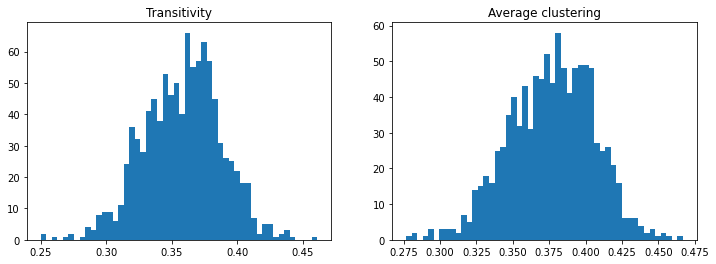

In [42]:
random.seed(0)

tran = []   # assign your graph transitivity values as a numpy array to this variable.
clus = []   # assign your average clustering coefficient values as a numpy array to this variable.

for count, item in enumerate(range(1000)):
    G = nx.watts_strogatz_graph(100, 4, 0.1)
    tran.append(nx.transitivity(G))
    clus.append(nx.average_clustering(G))
    
fig, axes = plt.subplots(1,2,figsize = (12, 4))
axes[0].title.set_text("Transitivity");         # plot transitivity in subplot 0
axes[1].title.set_text("Average clustering");   # plot average clustering in subplot 1

tran = np.array(tran)
clus = np.array(clus)

axes[0].hist(tran, bins = 50)

axes[1].hist(clus, bins = 50)

# YOUR CODE HERE
# raise NotImplementedError()

In [43]:
#hidden tests for Question 17 are within this cell

### Q18. (10 points, Manually graded) Compare the distribution plots of clustering coefficient values across the different network generative models. 

### Which model gives the highest clustering coefficient values? 

### Which model gives the lowest clustering coefficient values? 

### Explain your results using the assumptions and mechanisms of the models.

Your explanation should be of the form: 

Model X produces networks with the highest clustering coefficient because...

Model Y produces networks with the lowest clustering coefficient because...


The Small World Model produces networks with the highest clustering coefficient because that is its design. Small World Models being with a ring of n nodes connected to k nearest neighbors (100 nodes, connected to their 4 nearest neighbors, in our example).  With probability of .1, an edge gets detached and reattached elsewhere. With only 10% of edges being rewired, we maintain a decently high average clustering coefficient.

The Erdős-Rényi Model produces the lowest clustering coefficient values as expected.  This model starts with n nodes and a parameter p, which represents the probability of creating an edge between each pair of nodes (100 nodes and roughly 9% in our case, respectively). With such a low probability of edges even being created in this model, it is expected that we would have a low average clustering coefficient. 

---
## Part 3. Link prediction

In this part, we are going to compare various link prediction features to predict if an edge exists in the astrophysics collaboration network. We will use the following features and their corresponding `NetworkX` functions (See [NetworkX link prediction documentation](https://networkx.github.io/documentation/networkx-1.9/reference/algorithms.link_prediction.html)).  

- Resource Allocation Index --  `resource_allocation_index(G[, ebunch])`. 
- Jaccard Coefficient -- `jaccard_coefficient(G[, ebunch])`. 
- Adamic-Adar Index -- `adamic_adar_index(G[, ebunch])`.
- Preferential Attachment Score -- `preferential_attachment(G[, ebunch])`. 
- Number of Common Neighbors -- This feature will be provided in our data set. 

The `assets/part3.csv` contains the set of pairs of nodes you will use for training and testing in the prediction task. Some of the pairs in `assets/part3.csv` are connected by an edge in the network and others are not. Our goal will be to predict which ones are connected using our link prediction features. 

The file contains 4 columns (`v1`, `v2`, `num`, `label`). Columns `v1` and `v2` represent pairs of nodes (v1,v2), `num` is the number of common neighbors between v1 and v2, and `label` is 1 if the edge (v1,v2) exists in the network and 0 otherwise. 

The astrophysics collaboration network `G` is fixed. That is, we will not make changes to the network. We will use the structure of the network to "predict" which pairs of nodes are connected (pretending we cannot simply check if the edge `(v1,v2)` exists in `G`). The intuition here is that we will pretend that these edges are not yet present in the network, and use the link prediction features to predict whether they will emerge. 

Caveats: 

Note that we are cheating slightly since we are using these edges to compute the link prediction features. Typically, if we are trying to predict edges that have not yet emerged, we cannot use them at all. 

As you may see, there is approximately the same number of positive and negative labels in the test dataset. This is artificially selected to facilitate the prediction task. In reality, this is rarely the case since in link prediction positive samples are far less common than negative ones.

However, we will use this setup to illustrate the procedure. 

Let's begin by importing the libraries we will need. 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

Now let's load data from `part3.csv`, which contains the number of common neighbors and labels. 
### Q19.  (5 points, Manually graded) Expand the dataframe to include the other features and print part of the resulting dataframe. This may take some time. Print the top 10 rows of the dataframe. 

Recall that you should not change the network `G` in any way. 

In [45]:
%%time
G = nx.read_gml('assets/astro_phy.gml')
link_pred = pd.read_csv('assets/part3.csv')
link_pred['rai'] = [lis[2] for lis in list(nx.resource_allocation_index(G,list(zip(link_pred.v1,link_pred.v2))))]  # resource_allocation_index of the node pairs
link_pred['jac'] = [lis[2] for lis in list(nx.jaccard_coefficient(G,list(zip(link_pred.v1,link_pred.v2))))]  # jaccard_coefficient of the node pairs
link_pred['ada'] = [lis[2] for lis in list(nx.adamic_adar_index(G,list(zip(link_pred.v1,link_pred.v2))))]  # adamic_adar of the node pairs
link_pred['pa']  = [lis[2] for lis in list(nx.preferential_attachment(G,list(zip(link_pred.v1,link_pred.v2))))]  # preferential_attachment of the node pairs

link_pred.head(10)

# YOUR CODE HERE
# raise NotImplementedError()



CPU times: user 48.5 s, sys: 115 ms, total: 48.6 s
Wall time: 48.6 s


,v1,v2,num,label,rai,jac,ada,pa
0,"BASKETT, L","SUTHERLAND, TMCW",9,0,0.096704,0.409091,1.983937,240
1,"BROWNE, IWA","JACKSON, N",10,1,0.559679,0.222222,3.442149,516
2,"MACRI, L","AJHAR, EA",8,0,0.144501,0.068966,1.965276,3700
3,"ALVAREZ, D","MILLER, K",13,1,0.596234,0.866667,4.158348,196
4,"ABAD, C","HONEYCUTT, K",40,1,0.719897,0.727273,9.872832,2256
5,"TILANUS, RPJ","MCMAHON, RG",5,0,0.109267,0.023364,1.301187,8568
6,"WILKES, BJ","PETERS, J",20,1,0.414744,0.210526,5.089013,2844
7,"BONALDI, M","SALEMI, F",35,1,0.847962,0.714286,9.399725,1764
8,"TUTHILL, PG","NISHIMOTO, D",8,1,0.656226,0.500000,3.148903,135
9,"MORALES, J","FARACH, H",15,1,0.531780,0.326087,4.464370,840


### Q20. (4 points, Manually graded) Plot histograms of the values of each of the features (num, rai, jac, ada, pa); one set of histograms will be for pairs of nodes with label = 1 and another set for pairs of nodes with label = 0.

There will be a total of 10 histograms -- 2 per feature. 


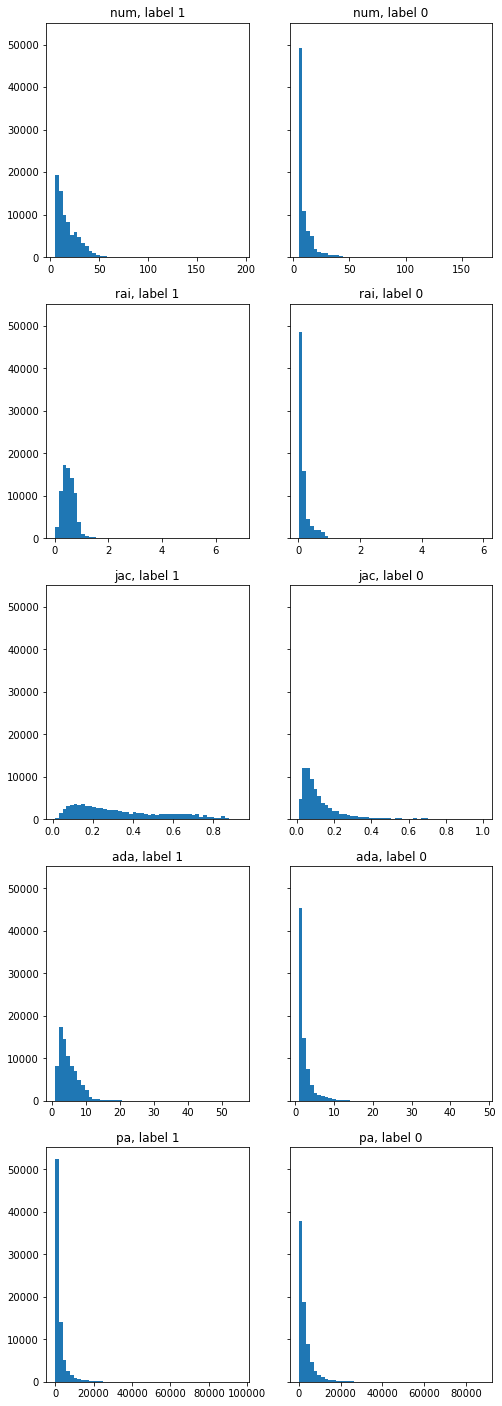

In [46]:
# selected_attributes = None

l1_df = link_pred[link_pred['label']==1]
l0_df = link_pred[link_pred['label']==0]

fig, ax = plt.subplots(5,2,figsize = (8, 25), sharey = True)

ax[0,0].title.set_text("num, label 1");      
ax[0,1].title.set_text("num, label 0"); 
ax[1,0].title.set_text("rai, label 1");      
ax[1,1].title.set_text("rai, label 0"); 
ax[2,0].title.set_text("jac, label 1");      
ax[2,1].title.set_text("jac, label 0"); 
ax[3,0].title.set_text("ada, label 1");      
ax[3,1].title.set_text("ada, label 0"); 
ax[4,0].title.set_text("pa, label 1");      
ax[4,1].title.set_text("pa, label 0"); 

ax[0,0].hist(np.array(l1_df.num), bins = 50)
ax[0,1].hist(np.array(l0_df.num), bins = 50)
ax[1,0].hist(np.array(l1_df.rai), bins = 50)
ax[1,1].hist(np.array(l0_df.rai), bins = 50)
ax[2,0].hist(np.array(l1_df.jac), bins = 50)
ax[2,1].hist(np.array(l0_df.jac), bins = 50)
ax[3,0].hist(np.array(l1_df.ada), bins = 50)
ax[3,1].hist(np.array(l0_df.ada), bins = 50)
ax[4,0].hist(np.array(l1_df.pa), bins = 50)
ax[4,1].hist(np.array(l0_df.pa), bins = 50)

plt.show()

# YOUR CODE HERE
# raise NotImplementedError()

### Q21. (1 points, Autograded) Measure the correlation between each of the five attributes and the label. 

**Hint**: You may apply [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) for this question. The desired correlation dataframe should be in a square size, and the index names and the column names are the same. 

In [47]:
corr = link_pred[['num','rai','jac','ada','pa','label']].corr()  # Assign your correlation dataframe to this variable. This should be a float. 
corr
# YOUR CODE HERE
# raise NotImplementedError()

,num,rai,jac,ada,pa,label
num,1.000000,0.691309,0.526966,0.977110,0.284549,0.377449
rai,0.691309,1.000000,0.694429,0.826830,-0.004753,0.619286
jac,0.526966,0.694429,1.000000,0.618852,-0.286523,0.460965
ada,0.977110,0.826830,0.618852,1.000000,0.208934,0.474494
pa,0.284549,-0.004753,-0.286523,0.208934,1.000000,-0.100315
label,0.377449,0.619286,0.460965,0.474494,-0.100315,1.000000


In [48]:
#hidden tests for Question 21 are within this cell


### Q22. (1 point, Autograded) Based on the correlations, which single feature do you expect to perform best at predicting edges?

Set the column name of your selection into the variable `selected_attribute` as a string. For example, if you select the attribute "number of common neighbors", indicate this as

```python
selected_attribute = "num"
```

In [49]:
selected_attribute = 'rai' #choose your selected attribute. This should be a string. 

# YOUR CODE HERE
# raise NotImplementedError()

In [50]:
#hidden tests for Question 22 are within this cell

### Q23. (20 points, Manually graded) Link prediction

We are now ready to train and test classifiers for the link prediction task. 

First, we will split the data into training and testing.

In [51]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    link_pred[["num", "rai","jac","ada","pa"]], link_pred.label, test_size=0.3, random_state=42)

In [52]:
y_train

97642     1
153969    1
134975    0
143864    0
148909    1
         ..
119879    0
103694    1
131932    0
146867    0
121958    1
Name: label, Length: 109775, dtype: int64

Now use each feature as the only attribute for the link prediction task. Train and test the performance of four different models:

- `LinearSVC`
- `GaussianNB`
- `RandomForestClassifier`
- `AdaBoostClassifier`

You can choose any hyperparameters. 

Create a dataframe `F1_score_df`, which stores the F1-score of your test set for each of the four features for each model.

Finally, train and test the performance of each model using all five features, and add a new column to the dataframe with the test F1 score. 


You dataframe will have the following format:

| model| num| rai| jac| ada|pa|all features|
|-|-|-|-|-|-|-|
|LinearSVC|
|GaussianNB|
|RandomForestClassifier|
|AdaBoostClassifier|

Be sure to print the final dataframe. 

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

F1_score = [['LinearSVC','GaussianNB','RandomForestClassifier','AdaBoostClassifier']]


for i in ['num','rai','jac','ada','pa']:
    temp = []
    svc_clf = make_pipeline(StandardScaler(), LinearSVC(random_state = 0))
    svc_clf.fit(X_train[i].to_numpy().reshape(-1, 1),y_train)
    preds = svc_clf.predict(X_test[i].to_numpy().reshape(-1, 1))
    temp.append(f1_score(y_test,preds))
    
    g_clf = GaussianNB()
    g_clf.fit(X_train[i].to_numpy().reshape(-1, 1),y_train)
    preds = g_clf.predict(X_test[i].to_numpy().reshape(-1, 1))
    temp.append(f1_score(y_test,preds))
    
    rf_clf = RandomForestClassifier(random_state = 0)
    rf_clf.fit(X_train[i].to_numpy().reshape(-1, 1),y_train)
    preds = rf_clf.predict(X_test[i].to_numpy().reshape(-1, 1))
    temp.append(f1_score(y_test,preds))
    
    ada_clf = AdaBoostClassifier(random_state = 0)
    ada_clf.fit(X_train[i].to_numpy().reshape(-1, 1),y_train)
    preds = ada_clf.predict(X_test[i].to_numpy().reshape(-1, 1))
    temp.append(f1_score(y_test,preds))
    
    F1_score.append(temp)
    
    
#add all_features

temp = []
svc_clf = make_pipeline(StandardScaler(), LinearSVC(random_state = 0))
svc_clf.fit(X_train,y_train)
preds = svc_clf.predict(X_test)
temp.append(f1_score(y_test,preds))

g_clf = GaussianNB()
g_clf.fit(X_train,y_train)
preds = g_clf.predict(X_test)
temp.append(f1_score(y_test,preds))

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train,y_train)
preds = rf_clf.predict(X_test)
temp.append(f1_score(y_test,preds))

ada_clf = AdaBoostClassifier(random_state = 0)
ada_clf.fit(X_train,y_train)
preds = ada_clf.predict(X_test)
temp.append(f1_score(y_test,preds))

F1_score.append(temp)


# YOUR CODE HERE
# raise NotImplementedError()

In [54]:
F1_score

F1_score_df = pd.DataFrame(F1_score)

F1_score_df = F1_score_df.T.rename(columns = {0:'model',1:'num',2:'rai',3:'jac',4:'ada',5:'pa',6:'all features'})

F1_score_df
# YOUR CODE HERE
# raise NotImplementedError()

,model,num,rai,jac,ada,pa,all features
0,LinearSVC,0.610414,0.813887,0.667639,0.693195,0.644604,0.821786
1,GaussianNB,0.555127,0.789968,0.620464,0.632489,0.651247,0.708911
2,RandomForestClassifier,0.697149,0.80317,0.736105,0.740899,0.598538,0.875745
3,AdaBoostClassifier,0.697286,0.868025,0.742657,0.797866,0.518097,0.86922


# End